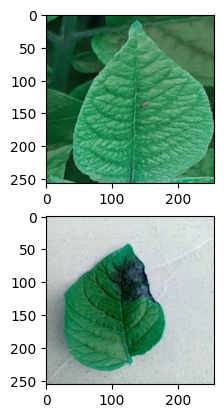

In [19]:
import cv2
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
img1=cv2.imread("/kaggle/input/potato-leaf-healthy-and-late-blight/Healthy/Healthy (10).jpg")
plt.imshow(img1)
plt.subplot(2,1,2)
img2=cv2.imread("/kaggle/input/potato-leaf-healthy-and-late-blight/Late Blight/Late_Blight (449).jpg")
plt.imshow(img2)


In [21]:
image_size=(200,200)
batch_size=16 
import tensorflow
data_dir=tensorflow.keras.preprocessing.image_dataset_from_directory("/kaggle/input/potato-leaf-healthy-and-late-blight",
                                                                   shuffle=True,
                                                                   image_size=image_size,
                                                                   batch_size=batch_size)

Found 430 files belonging to 2 classes.


In [22]:
class_names=data_dir.class_names
class_names

['Healthy', 'Late Blight']

In [23]:
def get_dataset(ds,train_split=0.7,val_split=0.2,test_split=0.1,shuffle=True,shuffle_size=100):
    ds_size=len(data_dir)
    data_dir_size=len(data_dir)
    if shuffle:
        ds=data_dir.shuffle(shuffle_size,seed=8)
        train_size=int(train_split*data_dir_size)
        val_size=int(val_split*data_dir_size)
        test_size=int(test_split*data_dir_size)
        train_ds=data_dir.take(train_size)
        val_ds=data_dir.skip(train_size).take(val_size)
        test_ds=data_dir.skip(train_size).skip(val_size).take(test_size)
        return train_ds,val_ds,test_ds

In [24]:
train_ds,val_ds,test_ds=get_dataset(data_dir)

In [25]:
from tensorflow import keras
n_classes=2
resize_rescale=keras.Sequential([
    keras.layers.Resizing(200,200),
    keras.layers.Rescaling(1.0/255)
])

1.0

In [26]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras import models,layers

In [49]:
input_shape=(batch_size,200,200,3)
model=Sequential([resize_rescale,
                  layers.Conv2D(10,(3,3),activation='relu',input_shape=input_shape),
                  layers.MaxPooling2D((2,2)),
                  layers.Dropout(0.5),
                  layers.Flatten(),
                  layers.Dense(10,activation='relu'),
                  layers.Dense(10,activation='relu'),
                  layers.Dense(n_classes,activation='sigmoid')
                               ])
model.build(input_shape=input_shape)
model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (16, 200, 200, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (16, 198, 198, 10)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (16, 99, 99, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (16, 99, 99, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (16, 98010)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (16, 10)               │       980,110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (16, 10)               │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (16, 3)                │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 980,533 (3.74 MB)

 Trainable params: 980,533 (3.74 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history=model.fit(

    train_ds,
    epochs=10,
    batch_size=batch_size,
    validation_data=val_ds

    
)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.7375 - loss: 0.6481 - val_accuracy: 0.8375 - val_loss: 0.3470
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.8857 - loss: 0.2689 - val_accuracy: 0.9875 - val_loss: 0.0584
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 283ms/step - accuracy: 0.9860 - loss: 0.0432 - val_accuracy: 0.9750 - val_loss: 0.0471
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.9865 - loss: 0.0363 - val_accuracy: 0.9875 - val_loss: 0.0349
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.9952 - loss: 0.0159 - val_accuracy: 1.0000 - val_loss: 0.0118
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.

In [37]:
import pandas as pd
import numpy as np

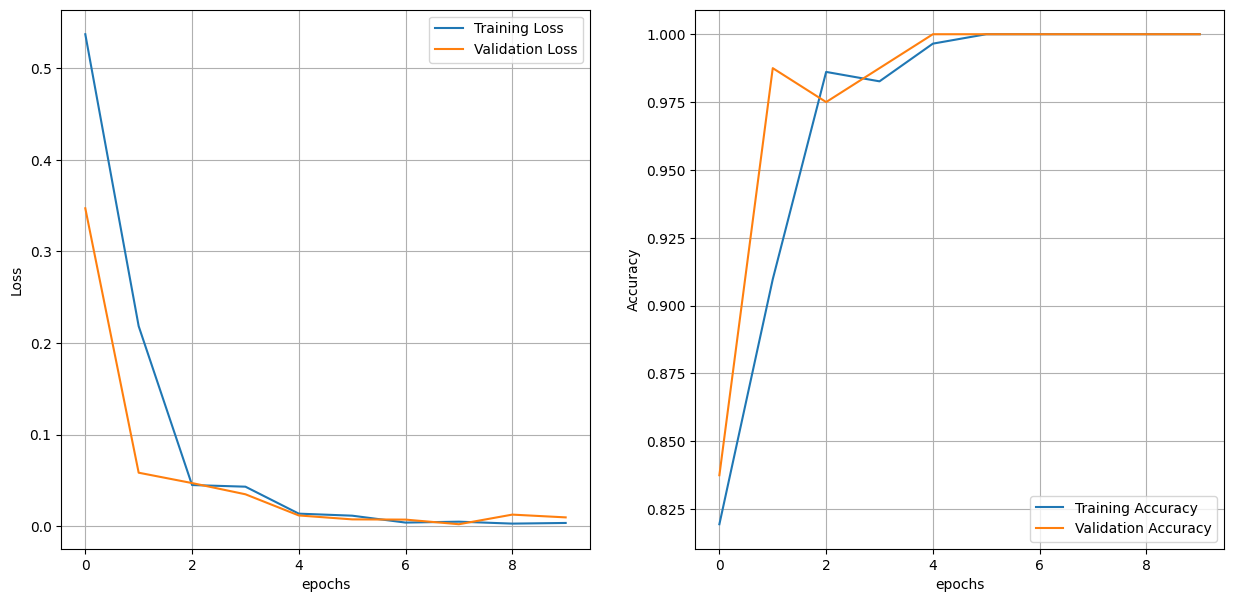

In [51]:
hist_data = pd.DataFrame(history.history)  
plt.figure(figsize=(15,7))  
plt.subplot(1,2,1)
plt.plot(hist_data['loss'], label='Training Loss')  
plt.plot(hist_data['val_loss'], label='Validation Loss')  
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1,2,2) 
plt.plot(hist_data['accuracy'], label='Training Accuracy')  
plt.plot(hist_data['val_accuracy'], label='Validation Accuracy') 
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()


In [31]:
model.evaluate(test_ds)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9583 - loss: 0.1111 


[0.1534535437822342, 0.9375]